# Кластеризация данных

Импорты библиотек:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, euclidean_distances

### Проведём предварительную обработку данных:

Импортируем датафрейм:

In [2]:
gym_df = pd.read_csv('C:/Users/dmitr/Downloads/5gym_churn.csv')
gym_df.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Приведём названия столбцов к общему виду:

In [3]:
gym_df.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [4]:
gym_df = gym_df.rename(columns={'gender': 'Gender'})
gym_df.columns

Index(['Gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

Проверим датафрейм на наличие пропущеных значений:

In [5]:
gym_df.isna().sum()

Gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Проверим датафрейм на наличие явных дубликатов:

In [6]:
print(gym_df.duplicated().sum())

0


Приведём столбец "Month_to_end_contract" к типу данных "int64":

In [7]:
gym_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [8]:
gym_df.astype({'Month_to_end_contract': 'int64'}).dtypes

Gender                                 int64
Near_Location                          int64
Partner                                int64
Promo_friends                          int64
Phone                                  int64
Contract_period                        int64
Group_visits                           int64
Age                                    int64
Avg_additional_charges_total         float64
Month_to_end_contract                  int64
Lifetime                               int64
Avg_class_frequency_total            float64
Avg_class_frequency_current_month    float64
Churn                                  int64
dtype: object

Проверим датафрейм на наличие неявных дубликатов:

In [9]:
print("Gender: " + str(gym_df['Gender'].unique()))
print("Near_Location: " + str(gym_df['Near_Location'].unique()))
print("Partner: " + str(gym_df['Partner'].unique()))
print("Promo_friends: " + str(gym_df['Promo_friends'].unique()))
print("Phone: " + str(gym_df['Phone'].unique()))
print("Contract_period: " + str(gym_df['Contract_period'].unique()))
print("Group_visits: " + str(gym_df['Group_visits'].unique()))
print("Age: " + str(gym_df['Age'].unique()))
print("Avg_additional_charges_total: " + str(gym_df['Avg_additional_charges_total'].unique()))
print("Month_to_end_contract: " + str(gym_df['Month_to_end_contract'].unique()))
print("Avg_class_frequency_total: " + str(gym_df['Avg_class_frequency_total'].unique()))
print("Avg_class_frequency_current_month: " + str(gym_df['Avg_class_frequency_current_month'].unique()))
print("Churn: " + str(gym_df['Churn'].unique()))

Gender: [1 0]
Near_Location: [1 0]
Partner: [1 0]
Promo_friends: [1 0]
Phone: [0 1]
Contract_period: [ 6 12  1]
Group_visits: [1 0]
Age: [29 31 28 33 26 34 32 30 23 27 35 25 36 24 21 37 22 19 20 38 39 18 41]
Avg_additional_charges_total: [ 14.22747042 113.20293765 129.44847933 ...  78.25054157  61.91265691
 178.86181361]
Month_to_end_contract: [ 5. 12.  1.  6.  3. 10. 11.  9.  4.  7.  8.  2.]
Avg_class_frequency_total: [0.02039795 1.92293606 1.85909835 ... 2.78614636 1.63010814 1.10183221]
Avg_class_frequency_current_month: [0.         1.91024352 1.73650189 ... 2.8314395  1.59623664 1.03526976]
Churn: [0 1]


Обработка данных завершена:

In [10]:
gym_df.head(10)

,Gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


### Выполним кластеризацию объектов:

#### Кластеризируем объекты иерархическим агломеративным методом. 
Методом, по которому вычисляется расстояние между кластерами выберем "ward". Метрикой, по которой вычисляется расстояние между объектами выберем евклидову:

In [11]:
sc = StandardScaler()
X_sc = sc.fit_transform(gym_df)
linked = linkage(X_sc, method = 'ward', metric='euclidean')

Построим дендрограмму иерархической кластеризации:

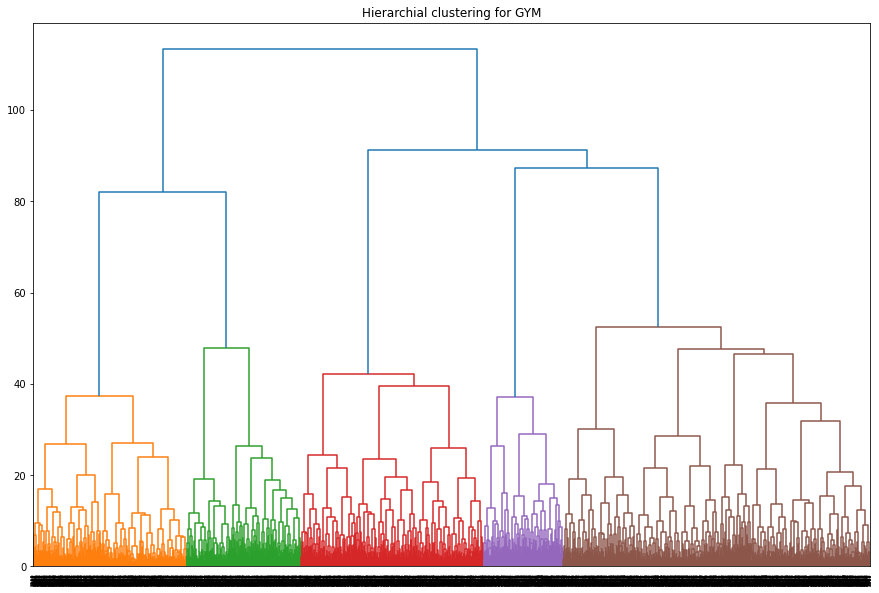

In [12]:
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

Из дендрограммы предположим, что оптимальное число кластеров равно 5.
Определим признаки (характеристики), оказавших наибольшее влияние на выделение кластеров:

In [13]:
gym_df['cluster'] = fcluster(linked, 5, criterion='maxclust')
gym_df.groupby('cluster').mean()

,Gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
1,0.510929,0.997268,0.337432,0.229508,1.000000,1.767760,0.295082,26.927596,115.042074,1.710383,0.986339,1.480896,1.057191,0.998634
2,0.502732,0.000000,0.500911,0.085610,1.000000,3.020036,0.229508,28.755920,135.796838,2.846995,2.805100,1.778723,1.610243,0.406193
3,0.472414,0.997701,0.703448,0.489655,1.000000,11.173563,0.548276,29.758621,165.752454,10.251724,4.370115,2.024836,2.025675,0.004598
4,0.520942,0.861257,0.471204,0.306283,0.000000,4.701571,0.421466,29.277487,144.221728,4.397906,3.782723,1.859095,1.727455,0.269634
5,0.532379,0.991138,0.431493,0.324472,0.997273,2.901159,0.456033,30.105658,156.587807,2.642808,5.037491,2.033922,2.036875,0.000000


После усреднения значений можно увидеть, что на выделение кластеров оказали влияние такие признаки, как: Near_Location, Phone, Contract_period, Month_to_end_contract и Churn. 

Опишем полученые кластеры:
1. К первому кластеру относятся люди либо покинувшие фитнес клуб, либо те, кто скоро может его покинуть. Соответственно там минимум сотрудников компаний партнёра. Это люди купившие абонемент на короткий срок, они редко посещают фитнес клуб и не любящие тратиться на дополнительные услуги. Примечательно также то, что, в среднем, в данном кластере самые молодые люди. Это "Ненадёжные клиенты".
2. Ко второму кластеру относятся люди, живущие далеко от фитнес клуба. Среди них минимальное количество людей, пришедших по промо друзей. Это "Далеко живущие люди".
3. К третьему кластеру относятся люди, с самой большой длительностью текущего абонемента. Они сильно тратятся на дополнительные услуги и зачастую посещают групповые занятия. Среди них небольшой процент покинувших фитнес клуб и они довольно часто посещают занятия. Зачастую это сотрудники компании партнёра. Это "Прибыльные клиенты".
4. Люди, относящиеся к четвёртому кластеру примечательны только тем, что ни один из них не указал номер своего телефона. Это "Скрытные люди".
5. В последнем кластере люди дольше всего посещающие питнес клуб. Ни один из них не покинул его. Они чаще всех посещают занятия. В среднем это самые великовозрастные люди. Это "Надёжные клиенты".

#### Кластеризируем объекты методом k-средних. 
Число кластеров зададим равным 5

In [14]:
sc = StandardScaler()
X_sc = sc.fit_transform(gym_df) # Стандартизация данных
model = KMeans(n_clusters=5, random_state=0) #Инициализация модели
model.fit(X_sc) # Подгонка модели по данным из X_sc

KMeans(n_clusters=5, random_state=0)

Определим евклидовы расстояния между объектами:

In [15]:
euclidean_distances(X_sc)

array([[0.        , 6.23013076, 5.89311576, ..., 5.97919373, 5.1148807 ,
        4.72925207],
       [6.23013076, 0.        , 5.02725244, ..., 4.60312425, 4.36382722,
        5.66335497],
       [5.89311576, 5.02725244, 0.        , ..., 4.92175006, 3.26647096,
        6.49395956],
       ...,
       [5.97919373, 4.60312425, 4.92175006, ..., 0.        , 3.49129681,
        5.98896315],
       [5.1148807 , 4.36382722, 3.26647096, ..., 3.49129681, 0.        ,
        6.29323763],
       [4.72925207, 5.66335497, 6.49395956, ..., 5.98896315, 6.29323763,
        0.        ]])

Определим объекты, относящиеся к каждому кластеру:

In [16]:
model.labels_

array([3, 1, 3, ..., 1, 3, 1])

Выведем таблицу средних значений в каждом кластере и определим признаки, оказавшие наибольшее влияние на выделение кластеров:

In [17]:
gym_df['cluster'] = model.labels_
gym_df.groupby('cluster').mean()

,Gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.559763,0.983432,0.392899,0.298225,0.900592,2.900592,0.478107,30.067456,161.035105,2.671006,4.803550,2.910258,2.919108,0.004734
1,0.502575,0.943357,0.740474,0.511843,0.901133,11.697219,0.556128,29.849640,163.518713,10.709578,4.673532,2.007930,2.002536,0.014418
2,0.500914,0.000000,0.466179,0.078611,0.917733,2.171846,0.208410,28.553931,133.552346,2.053016,2.628885,1.702013,1.512410,0.447898
3,0.472619,0.996429,0.447619,0.317857,0.896429,2.885714,0.423810,30.050000,152.644855,2.676190,4.866667,1.187701,1.182941,0.002381
4,0.513174,1.000000,0.332497,0.219573,0.907152,1.636136,0.294856,26.957340,114.992178,1.585947,0.973651,1.478722,1.049109,0.998745


После усреднения значений можно увидеть, что на выделение кластеров оказали влияние такие признаки, как: Near_Location, Contract_period, Phone, Month_to_end_contract и Churn.

Опишем полученые кластеры:

1. К первой группе относятся "Идеальные клиенты". Это люди пришедшие по промо друзей или являющиеся сотрудниками компании партнёра и они имеют самый длительный абонимент, больше всего тратятся на дополнительные услуги и зачастую посещают групповые занятия. Среди них мало людей покинувших клуб.
2. Второй кластер состоит из людей живущих далеко от фитнес клуба. Среди них мало тех, кто пришёл по промо друзей и они реже всех посещают групповые занятия. Среди них приличный процент покинули фитнес клуб. Это "Далеко живущие люди".
3. В третьем кластере находятся "Надёжные клиенты" - те, среди которых минимальный процент покинувших фитнес клуб. Они дольше всех посещают его и чаще всех ходят на занятия. В среднем это самые великовозрастные люди.
4. Четвёртый кластер состоит из "Ненадёжных клиентов". Большинство из них уже покинули клуб. В среднем они занимаются по абонементам с наименьшей длительностью, реже всех ходят в спортзал и мало тратятся. Как правило это самые молодые люди.
5. В пятом кластере "Скрытные люди" н указавшие свой телефон.

Определим оптимальное число кластеров  методом "локтя":

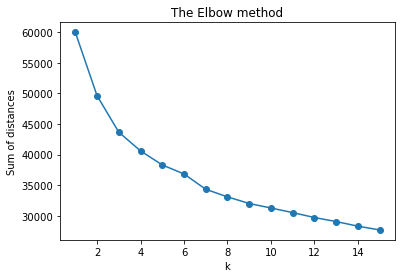

In [18]:
K = range(1, 16)
models = [KMeans(n_clusters = k, random_state=0).fit(X_sc) for k in K]
dist = [model.inertia_ for model in models]

plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow method')
plt.show()

Из графика видно, что график становится круче при значении k=5, что означает, что оптимальное число кластеров равно пяти.

**Вывод:** в ходе выполнения работы были изучены алгоритмы и методы кластерного анализа. Над набором данных 5gym_churn была проведена кластеризация иерархическим агломеративным методом и методом k-средних. Было выявлено 5 кластеров - "Прибыльные клиенты", "Далеко живущие люди", "Надёжные клиенты", "Ненадёжные клиенты" и "Скрытные люди".

## Дополнительное задание

Построим метрики силуэтов для количества кластеров от 2 до 10:

In [26]:
res = []
count = []
for i in range(2,11):
    count.append(i)
    sc = StandardScaler()
    x_sc = sc.fit_transform(gym_df)
    km = KMeans(n_clusters=i, random_state=0)
    labels = km.fit_predict(X_sc)
    res.append(silhouette_score(x_sc, labels))

d = {'count': count, 'res': res}
df = pd.DataFrame(data=d)
df

,count,res
0,2,0.174397
1,3,0.166808
2,4,0.153013
3,5,0.162003
4,6,0.154048
5,7,0.139435
6,8,0.136112
7,9,0.138003
8,10,0.152653
